In [1]:
from src.dataset_segmented import AnimeAudioDataset
import torch
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# IMPORTANT: Remember the features and other data are not normalized. Check dataset_segmented.

In [3]:
data = AnimeAudioDataset()

Boku_no_Hero_Academia_10
Death_Note_21
Haikyuu!!_23
Death_Note_35
Kimetsu_no_Yaiba_23
Made_in_Abyss_7
Vinland_Saga_17
Mob_Pyscho_100_4
Cowboy_Bebop_5
Vinland_Saga_1
Haikyuu!!_8
One_Punch_Man_9
Made_in_Abyss_5
Kimetsu_no_Yaiba_24
Haikyuu!!_13
One_Punch_Man_5
Haikyuu!!_10
Cowboy_Bebop_7
Kimetsu_no_Yaiba_10
Kimetsu_no_Yaiba_2
Yakusoku_no_Neverland_5
Kimetsu_no_Yaiba_8
One_Punch_Man_4
Death_Note_31
Shingeki_no_Kyojin_21
One_Punch_Man_7
Haikyuu!!_3
Haikyuu!!_6
Vinland_Saga_5
Vinland_Saga_24
Haikyuu!!_4
Boku_Dake_ga_inai_Machi_9
Death_Note_23
Cowboy_Bebop_4
Made_in_Abyss_12
Boku_Dake_ga_inai_Machi_2
Yakusoku_no_Neverland_2
Cowboy_Bebop_18
Made_in_Abyss_11
Shingeki_no_Kyojin_11
Shingeki_no_Kyojin_1
Mob_Pyscho_100_1
Boku_no_Hero_Academia_3
Shigatsu_wa_kimi_no_Uso_10
Kimetsu_no_Yaiba_14
Vinland_Saga_22
Haikyuu!!_21
Vinland_Saga_16
Vinland_Saga_19
Cowboy_Bebop_9
Death_Note_16
Shingeki_no_Kyojin_2
Kimetsu_no_Yaiba_20
Kimetsu_no_Yaiba_16
Haikyuu!!_5
Death_Note_18
Made_in_Abyss_8
Mob_Pyscho_100_2
K

In [4]:
len(data.labels96)

175

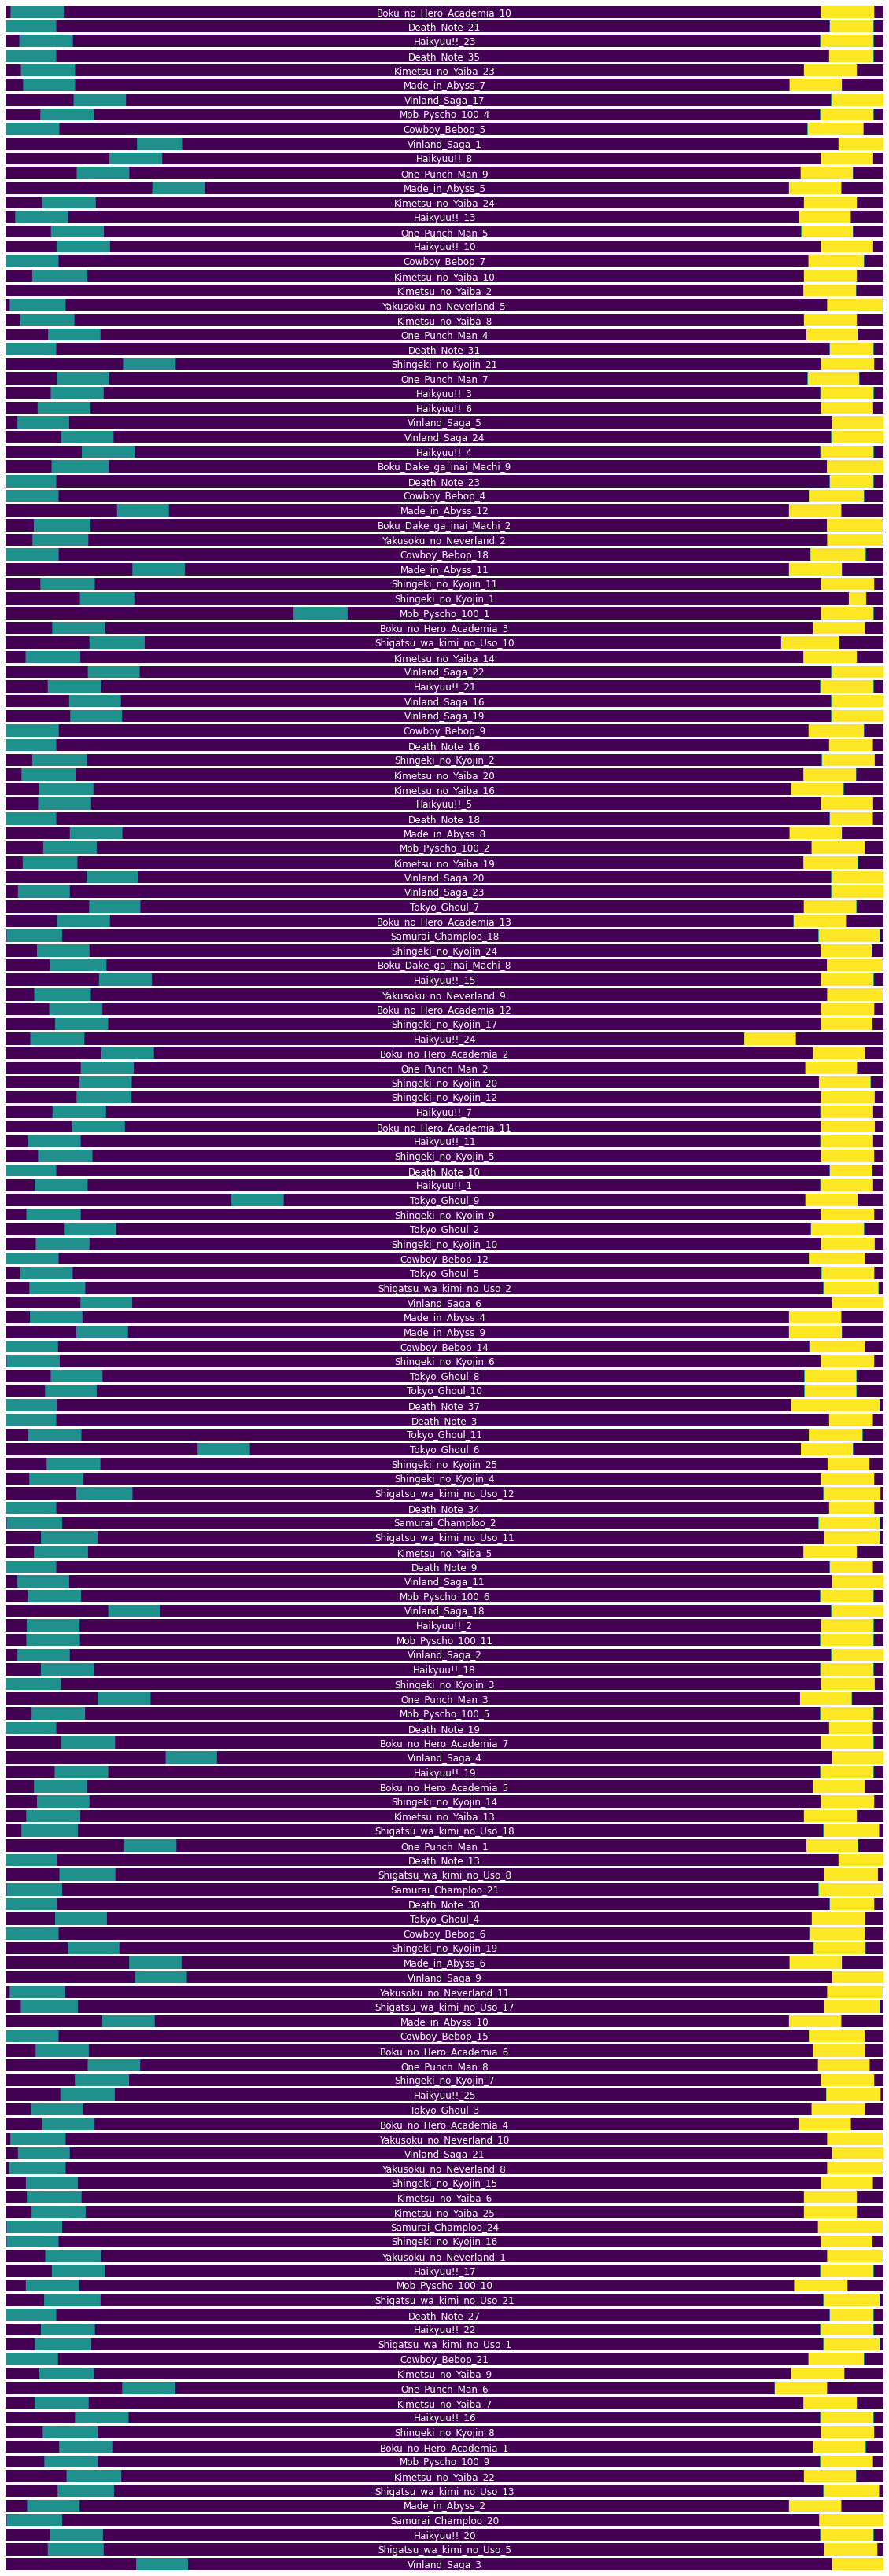

In [5]:
import matplotlib.pyplot as plt

width=20
height=60
plt.rcParams["figure.figsize"] = (width,height)
plt.rcParams['text.color'] = 'white'
# plt.axis('off')
axes=[]
fig=plt.figure()

i=0
for a in data.labels96:
    axes.append( fig.add_subplot(len(data.labels96),1, i+1) )
    subplot_title=(a)
    axes[-1].set_title(subplot_title, y=-.2)  
    plt.imshow(data.labels96[a].cpu().numpy().reshape((1,-1)), aspect='auto')
    plt.axis('off')
    i += 1   
plt.show()

In [6]:
f, m, l, t, l96 = data.get_all('Boku_no_Hero_Academia_10')

In [7]:
m[0].size()

torch.Size([1, 96, 64])

In [8]:
f[0].size()

torch.Size([128])

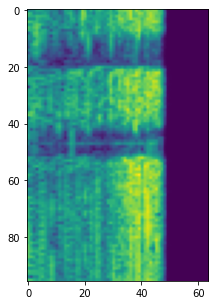

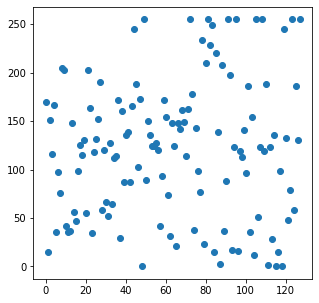

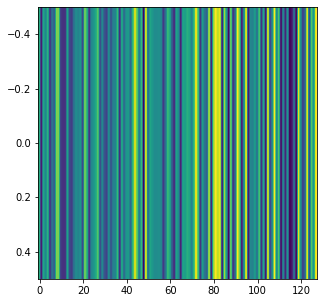

In [9]:
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(m[10][0].detach().numpy())
plt.show()
plt.scatter(np.arange(128),f[0].cpu().numpy())
plt.show()
plt.imshow(f[0].cpu().numpy().reshape((1,-1)), aspect='auto')
plt.show()

In [10]:
m_n = np.zeros((96,64))
m_n + m[0][0].detach().numpy()
f_n = np.zeros((128))
f_n + f[0].cpu().numpy()

array([170.,  15., 151., 116., 167.,  36.,  97.,  76., 205., 203.,  42.,
        36.,  37., 148.,  56.,  47.,  98., 125., 115., 131.,  55., 203.,
       164.,  35., 118., 132., 152., 190.,  58., 120.,  67.,  52., 127.,
        64., 112., 114., 172.,  29., 160.,  87., 136., 139.,  87., 166.,
       245., 188., 103., 173.,   0., 255.,  89., 150., 136., 124., 124.,
       127., 120.,  42.,  93., 172., 154.,  74.,  31., 148., 124.,  21.,
       148., 142., 161., 149., 114., 162., 255., 178.,  38., 143.,  98.,
        77., 234.,  23., 210., 255., 229., 249.,  15., 220., 139.,   3.,
       208.,  37.,  88., 255., 198.,  17., 123., 255.,  16., 119., 113.,
       141.,  96., 186.,  36., 154.,  12., 255.,  51., 123., 255., 119.,
       188.,   2., 123.,  28., 136.,   0.,  15.,  98.,   0., 245., 133.,
        48.,  79., 255.,  58., 186., 130., 255.])

In [11]:
def show(m, f):
    plt.rcParams["figure.figsize"] = (5,5)
    plt.imshow(m)
    plt.show()
    plt.scatter(np.arange(128),f)
    plt.show()
    plt.imshow(f.reshape((1,-1)), aspect='auto')
    plt.show()

In [12]:
def visualize(key):
    f, m, l, t, l96 = data.get_all(key)
    m_n = np.zeros((96,64))
    f_n = np.zeros((128))
    ncount = 0
    m_i = np.zeros((96,64))
    f_i = np.zeros((128))
    icount = 0
    m_o = np.zeros((96,64))
    f_o = np.zeros((128))
    ocount = 0

    segments = f.size()[0]
    for i in range(segments):
        # first and last 2 seconds tend to be outliers
        if i == 0 or i == 1:
            continue
        if i == segments or i == segments-1:
            continue

        if l96[i] == 0: # normal
            m_n += m[i][0].detach().numpy()
            f_n += f[i].cpu().numpy()
            ncount += 1
        elif l96[i] == 1: # intro
            m_i += m[i][0].detach().numpy()
            f_i += f[i].cpu().numpy()
            icount += 1
        elif l96[i] == 2: # outro
            m_o += m[i][0].detach().numpy()
            f_o += f[i].cpu().numpy()
            ocount += 1

    m_n /= ncount
    f_n /= ncount
    m_i /= icount
    f_i /= icount
    m_o /= ocount
    f_o /= ocount

    print ('normal')
    show(m_n,f_n)
    print ('intro')
    show(m_i,f_i)
    print ('outtro')
    show(m_o,f_o)

normal


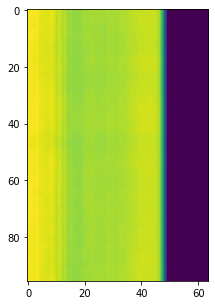

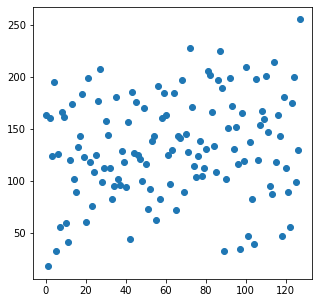

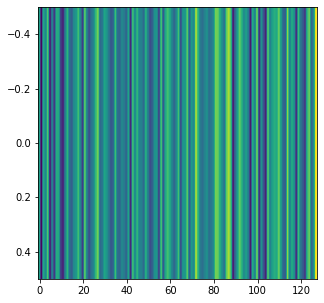

intro


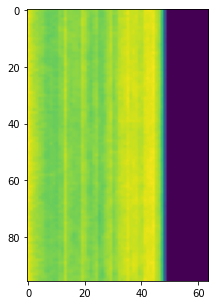

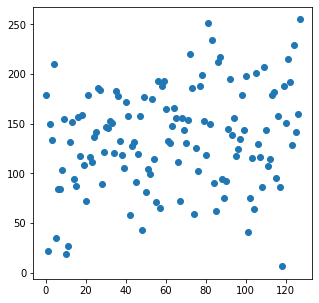

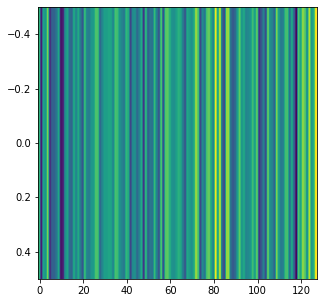

outtro


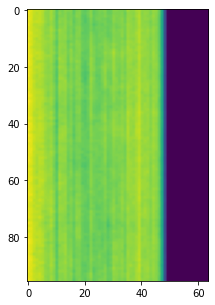

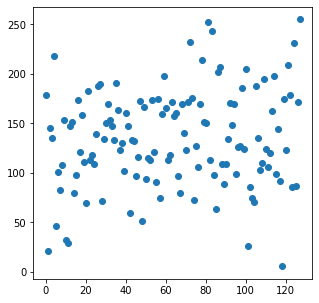

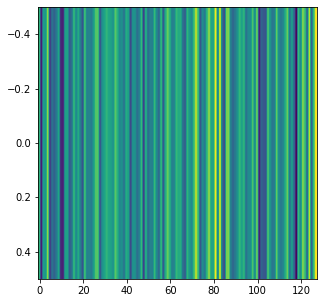

In [13]:
visualize('Boku_no_Hero_Academia_10')

In [14]:
valid_len = len(data)//5
train_len = len(data)-valid_len
valid, train = torch.utils.data.random_split(data, [valid_len, train_len])

In [15]:
len(train)

140

In [21]:
X,y=0,0
X_total = [t[0].cpu().numpy() for t in train]
y_total = [t[1].cpu().numpy() for t in train]

In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_total[0], y_total[0])

AdaBoostClassifier(n_estimators=100, random_state=0)

In [25]:
clf.score(X_total[0], y_total[0])

0.979050279329609

In [27]:
clf.score(X_total[2], y_total[2])

0.8736033519553073

In [28]:
clf.score(X_total[3], y_total[3])

0.8908730158730159

In [40]:
def unroll(X):
    rX = []
    for x in X:
        for smolx in x:
            rX.append(smolx)
    return rX

In [41]:
X = unroll(X_total)
y = unroll(y_total)

In [44]:
clf.fit(X,y)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [46]:
import pickle

In [47]:
filename = 'adaboost.sav'
pickle.dump(clf, open(filename, 'wb'))

In [48]:
# train acc
clf.score(X,y)

0.9354078578554801

In [50]:
# test
X_total_v = [t[0].cpu().numpy() for t in valid]
y_total_v = [t[1].cpu().numpy() for t in valid]
X_v = unroll(X_total_v)
y_v = unroll(y_total_v)
clf.score(X_v,y_v)

0.93010989854044